<a href="https://colab.research.google.com/github/sxs001/L4DA_resources/blob/main/UsedCar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
import pandas as pd
from sklearn import linear_model
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import statsmodels.api as sm

In [57]:
url='https://raw.githubusercontent.com/tdmhub/L4DA_resources/main/usedcar.csv'
df = pd.read_csv(url,delimiter=',')




In [58]:
df.dropna( inplace=True)

In [59]:
df

,Unnamed: 0,car_name,registration_year,insurance_validity,fuel_type,seats,kms_driven,ownsership,transmission,manufacturing_year,mileage(kmpl),engine(cc),max_power(bhp),torque(Nm),price(in lakhs)
0,0,2017 Mercedes-Benz S-Class S400,Jul-17,Comprehensive,Petrol,5,56000,First Owner,Automatic,2017,7.81,2996.0,2996.0,333.0,63.75
1,1,2020 Nissan Magnite Turbo CVT XV Premium Opt BSVI,Jan-21,Comprehensive,Petrol,5,30615,First Owner,Automatic,2020,17.40,999.0,999.0,9863.0,8.99
2,2,2018 BMW X1 sDrive 20d xLine,Sep-18,Comprehensive,Diesel,5,24000,First Owner,Automatic,2018,20.68,1995.0,1995.0,188.0,23.75
3,3,2019 Kia Seltos GTX Plus,Dec-19,Comprehensive,Petrol,5,18378,First Owner,Manual,2019,16.50,1353.0,1353.0,13808.0,13.56
4,4,2019 Skoda Superb LK 1.8 TSI AT,Aug-19,Comprehensive,Petrol,5,44900,First Owner,Automatic,2019,14.67,1798.0,1798.0,17746.0,24.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1548,1548,2020 Hyundai Creta SX Opt Diesel AT BSVI,Aug-20,Comprehensive,Diesel,5,35000,First Owner,Automatic,2020,1493.00,11345.0,11345.0,250.0,17.41
1549,1549,2022 Renault KWID 1.0 RXL Opt BSVI,2022,Third Party insurance,Petrol,5,10000,999 cc,2022,Power Steering,999.00,6706.0,6706.0,91.0,3.98
1550,1550,2017 Honda WR-V i-VTEC S,Jun-17,Comprehensive,Petrol,5,49000,First Owner,Manual,2017,17.50,1199.0,1199.0,887.0,5.85
1551,1551,2018 Volkswagen Polo 1.0 MPI Comfortline,May-18,Comprehensive,Petrol,5,40000,Second Owner,Manual,2018,18.78,999.0,999.0,75.0,4.75


In [60]:
X = df['engine(cc)']
X = X.values.reshape(-1, 1)
y = df['price(in lakhs)']

regr = linear_model.LinearRegression()
regr.fit(X, y)
y_pred = regr.predict(X)





In [54]:
X

array([[2996.],
       [ 999.],
       [1995.],
       ...,
       [1199.],
       [ 999.],
       [1197.]])

In [55]:
y_pred

array([167.27009601, 167.27009611, 167.27009606, ..., 167.2700961 ,
       167.27009611, 167.2700961 ])

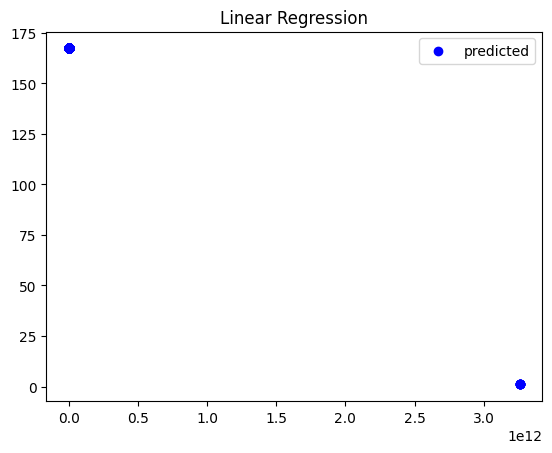

In [56]:
# Create a scatter plot
plt.scatter(X, y_pred, color='blue', label='predicted')



plt.title('Linear Regression')
plt.legend()
plt.show()

In [32]:
Xc=sm.add_constant(X)
model = sm.OLS(y, Xc).fit()

# Get the summary of the regression model, which includes p-values
summary = model.summary()

# Extract p-values from the summary
p_values = model.pvalues



print(summary)

                            OLS Regression Results                            
Dep. Variable:        price(in lakhs)   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                   0.01584
Date:                Wed, 17 Jan 2024   Prob (F-statistic):              0.900
Time:                        14:33:25   Log-Likelihood:                -14831.
No. Observations:                1549   AIC:                         2.967e+04
Df Residuals:                    1547   BIC:                         2.968e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        167.2701     88.734      1.885      0.0

In [ ]:
model.params

Weight    0.064781
Volume    0.009736
dtype: float64